In [ ]:
#マウント
from google.colab import drive
drive.mount('/content/drive')
##作業するディレクトリを指定する.
%cd '/content/drive/MyDrive/Colab_Notebooks/arXiv_data'

Mounted at /content/drive
/content/drive/MyDrive/Colab_Notebooks/arXiv_data


In [ ]:
#input_folder_path: 入力となるファイルの保存場所
input_folder_path ='/content/drive/MyDrive/Colab_Notebooks/arXiv_data/Step_6'
#output_folder_path: 出力となるpdfファイルの保存場所
output_folder_path = '/content/drive/MyDrive/Colab_Notebooks/arXiv_data/Step_7'

In [ ]:
#関係するツールの導入
import os
import numpy as np
import pandas as pd
import collections
import re
from string import digits

import sys
import time

In [ ]:
f = open(input_folder_path + '/k_means_id_list_paper.txt',"r")
file_names_list= []
for x in f:
  file_names_list.append(x.rstrip("\n"))
    #以下のようにしてしまうと、改行コードがlistに入ってしまうため注意
    #list_row.append(x)
f.close()

In [ ]:
len(file_names_list)

60

In [ ]:
path_a = input_folder_path + "/rate_data_100_paper.csv"
df = pd.read_csv(path_a)
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
display(df)

In [ ]:
def minmax_norm(list_input):
    return (list_input - list_input.min()) / ( list_input.max() - list_input.min())

In [ ]:
df_minmax_norm = minmax_norm(df)
display(df_minmax_norm)

In [ ]:
##K-means 法

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans
import numpy as np 

In [ ]:
#クラスタリングの結果からfile名をクラスタごとに分ける
# show_result (str_list,int_array,int) -> str_list_list
def show_result (file, result_k,n):
  result_file = []
  for i in range(n):
    result_file.append([])
  for j in range(len(file)):
    l = result_k[j]
    result_file[l].append(file[j])
  #return print(result_file)
  return result_file

In [ ]:
#傾向となる単語を取りだす
#df: データ k_means_result:k-means法でクラスタリングした結果, n:クラスタリングの個数
def trend (df,k_means_result,n,m,dictionary):
  trend = []
  df['cluster_id']=k_means_result
  for i in range(n):
    trend_n = df[df['cluster_id']==i].mean()
    trend_number = trend_n.drop('cluster_id', axis=0)
    trend_word = trend_number.sort_values(ascending = False)[0:m].index
    trend.append((i,trend_word))
  #return print(trend)
  return trend

In [ ]:
#k-means
result = KMeans(n_clusters=6).fit_predict(df_minmax_norm)

In [ ]:
show_result(file_names_list,result,6)

[['0704.2378', '0704.2381'],
 ['0704.0074',
  '0704.1556',
  '0704.1557',
  '0704.1892',
  '0704.2161',
  '0704.2384',
  '0704.0087',
  '0704.0210',
  '0704.0981',
  '0704.1005',
  '0704.1341',
  '0704.0125',
  '0704.0324',
  '0704.0337',
  '0704.0402',
  '0704.0497',
  '0704.0565',
  '0704.0786',
  '0704.1207'],
 ['0704.0236', '0704.1021'],
 ['0704.0026', '0704.0112'],
 ['0704.0317', '0704.0596', '0704.0853'],
 ['0704.1163', '0704.1164']]

In [ ]:
#それぞれのクラスターでよく用いられる単語10個
trend(df,result,6,10,df.columns)

[(0, Index(['subwords', 'smoktunowicz', 'nzv', 'unv', 'zaua', 'beidar', 'xadx',
         'mzv', 'prime', 'nuiv'],
        dtype='object')),
 (1,
  Index(['rng', 'couchot', 'statl', 'rngs', 'morita', 'ˆuε', 'trs', 'flanigan',
         'injective', 'zay'],
        dtype='object')),
 (2,
  Index(['gerhardt', 'νγxδ', 'claus', 'kxδ', 'ναxβ', 'χανα', 'ijϕiϕj', 'imcf',
         'arw', 'fανα'],
        dtype='object')),
 (3, Index(['kites', 'kite', 'wopp', 'trips', 'assessors', 'strut', 'vopp',
         'pathions', 'skybox', 'assessor'],
        dtype='object')),
 (4,
  Index(['roter', 'xts', 'rmlk', 'rmlj', 'haxs', 'sτsk', 'sjlq', 'ricy', 'pidy',
         'derdzinski'],
        dtype='object')),
 (5,
  Index(['zlatoˇs', 'andrej', 'kpp', 'ψak', 'ϕakk', 'berestycki', 'etkf', 'wdx',
         'maximizer', 'wεk'],
        dtype='object'))]

#階層的クラスタリング

average，ユーグリッド距離

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [ ]:
def plot_dendrogram(model, **kwargs):
   # Create linkage matrix and then plot the dendrogram

   # create the counts of samples under each node
    #要素の値が全てゼロの配列を作成する
   counts = np.zeros(model.children_.shape[0])
   n_samples = len(model.labels_)
   for i, merge in enumerate(model.children_):
      current_count = 0
      for child_idx in merge:
         if child_idx < n_samples:
            current_count += 1 # leaf node
         else:
            current_count += counts[child_idx - n_samples]
      counts[i] = current_count

   linkage_matrix = np.column_stack([model.children_, model.distances_,
counts]).astype(float)

   # Plot the corresponding dendrogram
   #dendrogram(linkage_matrix, **kwargs,labels = file_names_list,leaf_rotation=90 )#, orientation='left')
   dendrogram(linkage_matrix, **kwargs,labels = file_names_list, orientation='left')

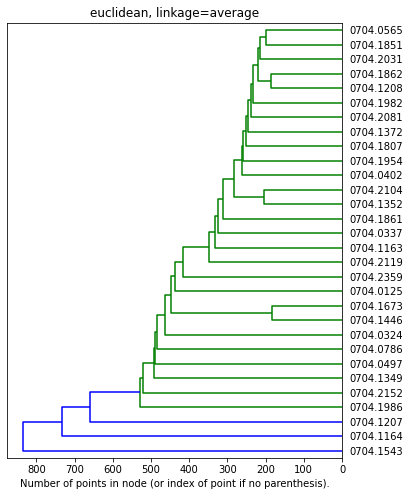

In [ ]:
parm_affinity = 'euclidean'
param_linkage = 'average'
  # setting distance_threshold=0 ensures we compute the full tree.
  # affinity: 距離の出す際の計算方法 
  #linkage : 観測セット間で使用する距離 ward マージされるクラスターの分散を最小限に抑える 
  #distance_threshold クラスターはマージされないリンケージ距離のしきい値
  #n_clusters 検索するクラスターの数
model = AgglomerativeClustering(affinity= parm_affinity,
linkage= param_linkage, 
distance_threshold=0,
n_clusters=None)
model = model.fit(df)
fig = plt.figure( figsize=(6,8))
plt.title(parm_affinity + ', linkage=' + param_linkage )
  # plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level')#, p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#plt.figure(figsize=(6, 8), dpi=300)
  #fig.savefig("dendrogram.pdf")
plt.savefig("dendrogram_z_euclidean_mean.pdf", bbox_inches='tight')
plt.show()

#k-means対象のファイルすべてで

In [ ]:
path_a = input_folder_path + "/rate_data_k_meansfiles__100_paper.csv"
df = pd.read_csv(path_a)
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
display(df)

In [ ]:
df_minmax_norm = df.apply(minmax_norm)

In [ ]:
display(df_minmax_norm)

,kite,rng,uopp,wopp,subword,nullity,trips,assessors,homt,strut,vopp,conv,morita,δαrδ,statl,rngs,pathions,skybox,the,assessor,rαβγδναxβ,trip,gerhardt,dancer,zds,δkπ,lopatinski,pseudospectra,zmg,trs,adstatl,zlatoˇs,cogen,νγxδ,dmzs,cpo,zigzag,sedenions,κpl,pseudospectrum,...,ttd,γtu,reissig,chingons,eγtl,subwords,claus,for,slyozov,appx,ppar,dimmg,bεr,itν,pathion,eitν,kerγ,imcf,couchot,uiv,emanation,opposites,niethammer,dνδ,srar,statr,cid,sail,andrej,midpoints,xuan,arw,kxδ,theorem,tripn,mandalas,βεh,adstatic,εiz,adeγtp
0,1.000000,0.000127,0.169113,0.135497,0.000091,0.000000,1.000000,1.000000,0.000087,1.000000,0.085196,0.000000,0.000234,0.000043,0.000053,0.000076,1.000000,0.000070,0.739848,1.000000,0.000078,1.000000,0.000116,0.000000,0.780350,0.000049,0.000051,0.000077,0.000074,0.000103,0.000053,0.000062,0.000053,0.000079,1.000000,1.000000,1.000000,1.000000,0.000053,0.000141,...,0.000060,0.000068,0.000056,0.441451,0.000051,0.000110,0.000216,0.054487,0.000049,0.000059,0.000057,0.000045,0.000036,0.000053,0.993138,0.000053,0.000051,0.000068,0.000045,0.000045,1.000000,1.000000,0.000047,0.000047,0.000051,0.000053,0.000000,1.000000,0.000098,0.228821,0.000076,0.000099,0.000101,0.180340,1.000000,1.000000,0.000038,0.000053,0.000065,0.000051
1,0.000068,0.921240,0.000148,0.000143,0.000163,0.000129,0.000213,0.000172,1.000000,0.000456,0.000137,0.000271,1.000000,0.000078,1.000000,1.000000,0.000209,0.000126,0.000000,0.000177,0.000141,0.000590,0.000208,0.000094,0.000234,0.000087,0.000092,0.000138,0.000134,0.000185,1.000000,0.000111,1.000000,0.000142,0.000242,0.000190,0.000938,0.000236,1.000000,0.000253,...,0.000108,0.000123,0.000101,0.000182,0.000092,0.000197,0.000388,0.137463,0.000089,0.000105,0.000102,0.000081,0.000065,0.000094,0.000252,0.000094,0.000092,0.000121,0.000081,0.000081,0.000190,0.000335,0.000084,0.000084,0.000092,1.000000,0.167590,0.000313,0.000177,0.000230,0.000136,0.000178,0.000182,0.117087,0.000159,0.000212,0.000069,1.000000,0.000117,0.000092
2,0.364563,0.000130,1.000000,1.000000,0.000093,0.000004,0.377667,0.325831,0.000089,0.728476,1.000000,0.000007,0.000239,0.000044,0.000054,0.000078,0.654533,1.000000,0.772556,0.215845,0.000080,0.671387,0.000118,0.000003,1.000000,0.000050,0.000052,0.000079,0.000076,0.000105,0.000054,0.000063,0.000054,0.000081,0.915385,0.503509,0.594464,0.647347,0.000054,0.000144,...,0.000062,0.000070,0.000057,1.000000,0.000052,0.000112,0.000220,0.103358,0.000050,0.000060,0.000058,0.000046,0.000037,0.000054,1.000000,0.000054,0.000052,0.000069,0.000046,0.000046,0.302149,0.640830,0.000048,0.000048,0.000052,0.000054,0.004344,0.335755,0.000100,0.172797,0.000077,0.000101,0.000104,0.163314,0.251795,0.671313,0.000039,0.000054,0.000066,0.000052
3,0.000203,0.000395,0.000255,0.000247,0.000282,0.000341,0.000367,0.000296,0.000271,0.000788,0.000236,0.000716,0.000725,0.000134,0.000164,0.000236,0.000361,0.000218,0.890144,0.000305,0.000243,0.001018,0.000359,0.000247,0.000404,0.000151,0.000159,0.000239,0.000231,0.000319,0.000164,0.000192,0.000164,0.000245,0.000418,0.000329,0.001619,0.000407,0.000164,0.000437,...,0.000187,0.000212,0.000175,0.000314,0.000159,0.000340,0.000669,0.000000,0.000153,0.000182,0.000176,0.000140,0.000113,0.000163,0.000435,0.000163,0.000159,0.000210,0.000140,0.000139,0.000329,0.000577,0.000145,0.000145,0.000159,0.000164,0.128798,0.000540,0.000305,0.000683,0.000235,0.000307,0.000314,0.132573,0.000274,0.000365,0.000119,0.000164,0.000202,0.000159
4,0.000154,0.000335,0.000216,0.000210,0.000239,0.000264,0.000311,0.000251,0.000229,0.000667,0.000200,0.000554,0.000615,0.000114,0.000139,0.000200,0.000306,0.000184,0.589086,0.000259,0.000206,0.000862,0.000304,0.000191,0.000342,0.000128,0.000135,0.000202,0.000196,0.000270,0.000139,0.000163,0.000139,0.000207,0.000354,0.000278,0.001372,0.000345,0.000139,0.000370,...,0.000158,0.000180,0.000148,0.000266,0.000135,0.000288,0.000567,0.293928,0.000130,0.000154,0.000149,0.000119,0.000096,0.000138,0.000369,0.000138,0.000135,0.000178,0.000119,0.000118,0.000278,0.000489,0.000123,0.

In [ ]:
#k-means
result = KMeans(n_clusters=6).fit_predict(df_minmax_norm)

In [ ]:
show_result(file_names_list,result,6)

[['0704.0236', '0704.1021'],
 ['0704.0026', '0704.0112'],
 ['0704.0074'],
 ['0704.0497'],
 ['0704.1556',
  '0704.1557',
  '0704.1892',
  '0704.2161',
  '0704.2378',
  '0704.2381',
  '0704.2384',
  '0704.0087',
  '0704.0210',
  '0704.0317',
  '0704.0596',
  '0704.0853',
  '0704.0981',
  '0704.1005',
  '0704.1341',
  '0704.0324',
  '0704.0337',
  '0704.0402',
  '0704.0565',
  '0704.0786',
  '0704.1163',
  '0704.1164',
  '0704.1207'],
 ['0704.0125']]

In [ ]:
#それぞれのクラスターでよく用いられる単語10個
trend(df,result,6,10,df.columns)

[(0,
  Index(['gerhardt', 'rαβγδναxβ', 'νγxδ', 'claus', 'kxδ', 'imcf', 'arw', 'that',
         'theorem', 'and'],
        dtype='object')),
 (1, Index(['kite', 'uopp', 'wopp', 'trips', 'assessors', 'strut', 'vopp',
         'pathions', 'skybox', 'assessor'],
        dtype='object')),
 (2,
  Index(['homt', 'morita', 'statl', 'cogen', 'adstatl', 'κpl', 'rngs', 'αqr',
         'rng', 'statr'],
        dtype='object')),
 (3, Index(['lopatinski', 'kuε', 'eγtf', 'γˆg', 'srarp', 'γtu', 'eγtl', 'appx',
         'kerγ', 'srar'],
        dtype='object')),
 (4,
  Index(['subword', 'δkπ', 'semicoherent', 'δαrδ', 'couchot', 'ϕak', 'zlatoˇs',
         'zmg', 'trs', 'zxmin'],
        dtype='object')),
 (5,
  Index(['reissig', 'ppar', 'itν', 'eitν', 'for', 'cid', 'theorem', 'and', 'the',
         'adeγtp'],
        dtype='object'))]

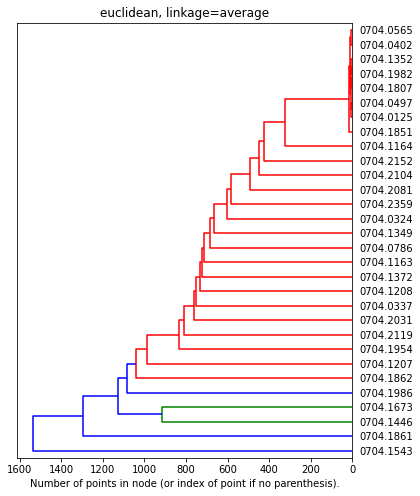

In [ ]:
parm_affinity = 'euclidean'
param_linkage = 'average'
  # setting distance_threshold=0 ensures we compute the full tree.
  # affinity: 距離の出す際の計算方法 
  #linkage : 観測セット間で使用する距離 ward マージされるクラスターの分散を最小限に抑える 
  #distance_threshold クラスターはマージされないリンケージ距離のしきい値
  #n_clusters 検索するクラスターの数
model = AgglomerativeClustering(affinity= parm_affinity,
linkage= param_linkage, 
distance_threshold=0,
n_clusters=None)
model = model.fit(df)
fig = plt.figure( figsize=(6,8))
plt.title(parm_affinity + ', linkage=' + param_linkage )
  # plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level')#, p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#plt.figure(figsize=(6, 8), dpi=300)
  #fig.savefig("dendrogram.pdf")
plt.savefig("dendrogram_z_euclidean_mean.pdf", bbox_inches='tight')
plt.show()

In [ ]:
#k-means
result = KMeans(n_clusters=6).fit_predict(df_minmax_norm)

In [ ]:
show_result(file_names_list,result,6)

IndexError: ignored

In [ ]:
#それぞれのクラスターでよく用いられる単語10個
trend(df,result,6,10,df.columns)

#20本

In [ ]:
f = open(input_folder_path + '/k_means_id_list_paper_20.txt',"r")
file_names_list= []
for x in f:
  file_names_list.append(x.rstrip("\n"))
    #以下のようにしてしまうと、改行コードがlistに入ってしまうため注意
    #list_row.append(x)
f.close()

In [ ]:
path_a = input_folder_path + "/rate_data_k_meansfiles__100_paper_20.csv"
df = pd.read_csv(path_a)
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df['any']

0      5.279077
1      4.439812
2      5.368450
3      4.906161
4      2.961604
5      0.710195
6      5.486005
7      1.465880
8      3.890252
9     -0.266800
10    -0.187912
11    18.715314
12     4.372785
13     5.486192
14    -1.008884
15     3.393326
16    -0.374953
17    -1.667828
18    -0.591091
19     4.350748
20     0.449639
21     0.096137
22     1.226025
23     2.398087
24    11.131716
25     2.487880
26     1.919176
27     5.112994
28    -0.137682
29    10.980938
30    27.204772
31    -3.067392
32    -1.931350
33    12.047987
34     5.047662
35    -0.374953
36     1.303227
37     0.910529
38    -0.425570
39     1.221132
40    -2.508657
41    -1.836986
42    -0.370744
43     1.552471
44    -0.995845
45     1.478332
46     0.544690
47     2.803086
48    18.659894
49     1.684217
50    -1.579468
51    -1.951406
52     4.976781
53     1.260163
54     1.753196
55     0.693090
56     7.253729
57     3.155521
58     4.180222
59    -1.040596
Name: any, dtype: float64

In [ ]:
df_minmax_norm =  df.apply(minmax_norm)
display(df_minmax_norm)

,kites,mlc,and,that,zωt,cid,rng,nonholonomic,then,nullity,for,subword,permitting,let,homt,morita,strut,conv,udx,algebra,theorem,multiplicative,trip,lamination,hyperbolic,lemma,aαβ,proof,nondegenerate,trs,such,curvature,with,zigzag,injective,lie,algebras,all,there,estimates,...,quaternion,follows,now,form,lim,any,novikov,discrete,contexts,case,vent,over,xixi,riemannian,azumaya,proposition,following,geodesic,sup,kukl,subalgebra,gij,conformally,module,prime,deduce,elliptic,box,null,app,contradiction,vector,hypersurface,spacelike,rhomr,math,which,type,bilinear,earthquake
0,1.000000,0.000109,0.012933,0.054547,0.000087,0.000000,0.000148,0.000299,0.167363,0.000189,0.225002,0.000106,0.000148,0.045439,0.000102,0.000273,1.000000,0.000397,0.000092,0.021469,0.180340,0.000494,1.000000,0.000302,0.002530,0.010046,0.000251,0.165686,0.000814,0.000120,0.258633,0.000021,0.517430,1.000000,0.000735,0.000000,0.020250,0.930730,0.089594,0.006156,...,0.237867,0.081481,0.127777,0.050739,0.006566,0.275714,0.000248,0.002140,0.020186,0.003696,1.000000,0.000000,0.000260,0.000016,0.000436,0.000000,0.000000,0.002543,0.006825,0.000238,0.001352,0.001766,0.000661,0.009106,0.008836,0.000000,0.004488,1.000000,0.000012,0.000484,0.003364,0.000000,0.000008,0.001653,0.000175,0.062527,0.887651,0.141844,0.001709,0.000429
1,0.000267,0.000196,1.000000,0.296139,0.000147,0.091378,0.921242,0.000503,0.578481,0.000319,0.293014,0.000178,0.000249,0.640857,1.000000,1.000000,0.000498,0.000668,0.000155,0.138865,0.117087,0.014361,0.000644,0.000543,0.004550,0.273344,0.000423,0.314205,0.001371,0.000202,0.264962,0.003721,0.250947,0.001025,0.519146,0.004150,0.073232,0.240574,0.154291,0.010369,...,0.001865,0.635877,0.016082,0.000000,0.011807,0.247990,0.000418,0.008776,1.000000,0.000000,0.000905,0.035311,0.000438,0.002829,0.000735,0.189020,0.801705,0.004574,0.012273,0.000401,0.002277,0.002975,0.001189,0.791542,0.004060,0.004045,0.008070,0.029451,0.002103,0.000816,0.005666,0.012104,0.001507,0.002973,0.000294,0.280712,0.389090,0.010001,0.333396,0.000771
2,0.863088,0.000111,0.197834,0.000000,0.000089,0.002368,0.000151,0.000304,0.114877,0.000193,0.265060,0.000108,0.000151,0.000000,0.000104,0.000278,0.728487,0.000404,0.000093,0.030214,0.163314,0.000504,0.671405,0.000308,0.002585,0.000000,0.000256,0.074487,0.000829,0.000122,0.369778,0.000122,0.450960,0.594499,0.000751,0.000113,0.020503,0.880569,0.056293,0.006271,...,0.048807,0.065276,0.129527,0.029679,0.006709,0.278667,0.000253,0.002186,0.010427,0.126511,0.829320,0.015062,0.000265,0.000092,0.000444,0.022160,0.002458,0.002599,0.006974,0.000243,0.001377,0.001799,0.000675,0.009276,0.002456,0.000110,0.004586,0.698929,0.000069,0.000493,0.003427,0.007585,0.000049,0.001689,0.000178,0.095202,0.672748,0.131466,0.001741,0.000438
3,0.000445,0.000338,0.375856,0.294595,0.000245,0.070227,0.000416,0.000838,0.087934,0.000530,0.180342,0.000297,0.000415,0.283139,0.000285,0.000764,0.000830,0.001112,0.000257,0.375817,0.132573,0.001386,0.001072,0.000937,0.007854,0.054386,0.000703,0.136973,0.002282,0.000336,0.214981,0.009772,0.335970,0.001706,0.002280,0.010939,0.249172,0.159924,0.095090,0.017261,...,0.988555,0.263666,0.117668,0.023765,0.020379,0.263396,0.000696,0.006641,0.001439,0.094135,0.001506,0.126592,0.000729,0.007431,0.001223,0.042195,0.129129,0.007894,0.021183,0.000668,0.003790,0.004952,0.002051,0.086112,0.006759,0.010660,0.013929,0.010134,0.005524,0.001358,0.009431,0.053323,0.003958,0.005131,0.000490,0.661962,0.583646,0.022056,0.004792,0.001331
4,0.000381,0.000286,0.559967,0.597128,0.000209,0.054052,0.000356,0.000716,0.169441,0.000454,0.421262,0.000254,0.000355,0.488907,0.000244,0.000653,0.000710,0.000951,0.000220,0.116638,0.741564,0.015076,0.000917,0.000794,0.006655,0.550982,0.000602,0.573625,0.001951,0.000287,0.365043,0.007576,0.205456,0.001459,0.010327,0.008476,0.308848,0.182831,0.079832,0.014760,...,0.002655,0.359611,0.142913,0.024098,0.017269,0.199160,0.000596,0.013218,0.001231,0.140578,0.001288,0.074905,0.000623,0.005761,0.001046,0.210337,0.363862,0.0

In [ ]:
#k-means
result = KMeans(n_clusters= 5 ).fit_predict(df_minmax_norm)

In [ ]:
show_result(file_names_list,result,5)

[['0704.2378',
  '0704.2381',
  '0704.2384',
  '0704.2723',
  '0704.3127',
  '0704.3443',
  '0704.3752',
  '0705.1316',
  '0705.2332',
  '0705.2522',
  '0705.3087'],
 ['0704.1557',
  '0704.0087',
  '0704.0317',
  '0704.0596',
  '0704.0853',
  '0704.0981',
  '0704.1005',
  '0704.1851',
  '0704.2081',
  '0704.0125',
  '0704.0402',
  '0704.0565',
  '0704.1163',
  '0704.1164',
  '0704.1207',
  '0704.1349',
  '0704.1352',
  '0704.1372',
  '0704.1861',
  '0704.1862',
  '0704.2031'],
 ['0704.2152'],
 ['0704.0210'],
 ['0704.0026',
  '0704.0074',
  '0704.0112',
  '0704.1556',
  '0704.1892',
  '0704.2161',
  '0705.0118',
  '0705.2067',
  '0704.0236',
  '0704.1021',
  '0704.1341',
  '0704.1446',
  '0704.1543',
  '0704.1673',
  '0704.1807',
  '0704.1982',
  '0704.1986',
  '0704.2119',
  '0704.0324',
  '0704.0337',
  '0704.0497',
  '0704.0786',
  '0704.1208',
  '0704.1954',
  '0704.2104',
  '0704.2359']]

In [ ]:
#それぞれのクラスターでよく用いられる単語10個
trend(df,result,4,20,df_minmax_norm.columns)

[(0, Index(['udx', 'trs', 'nonholonomic', 'mlc', 'curvature', 'rhomr',
         'conformally', 'injective', 'hyperbolic', 'cid', 'estimates', 'gij',
         'riemannian', 'parabolic', 'lamination', 'theorem', 'kukl', 'εij',
         'hypersurfaces', 'let'],
        dtype='object')),
 (1, Index(['subword', 'rng', 'zωt', 'permitting', 'homt', 'morita',
         'multiplicative', 'novikov', 'algebra', 'nil', 'algebras',
         'nondegenerate', 'aαβ', 'zbr', 'quadratic', 'eae', 'koszul', 'azumaya',
         'prime', 'subalgebra'],
        dtype='object')),
 (2,
  Index(['kites', 'strut', 'trip', 'zigzag', 'vent', 'box', 'all', 'quaternion',
         'hence', 'type', 'any', 'contexts', 'which', 'then', 'now', 'theorem',
         'such', 'with', 'are', 'since'],
        dtype='object')),
 (3,
  Index(['nullity', 'conv', 'null', 'contradiction', 'type', 'remark', 'now',
         'case', 'lemma', 'theorem', 'then', 'lie', 'deduce', 'have', 'hence',
         'there', 'vector', 'are', 'that',

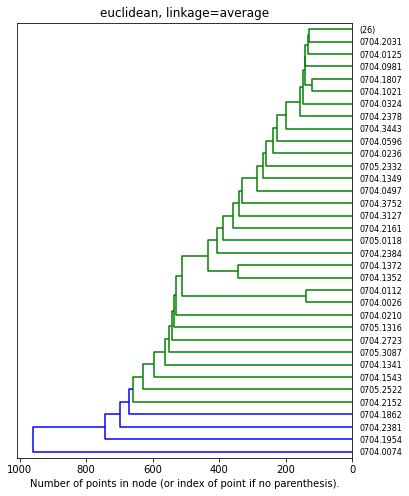

In [ ]:
parm_affinity = 'euclidean'
param_linkage = 'average'
  # setting distance_threshold=0 ensures we compute the full tree.
  # affinity: 距離の出す際の計算方法 
  #linkage : 観測セット間で使用する距離 ward マージされるクラスターの分散を最小限に抑える 
  #distance_threshold クラスターはマージされないリンケージ距離のしきい値
  #n_clusters 検索するクラスターの数
model = AgglomerativeClustering(affinity= parm_affinity,
linkage= param_linkage, 
distance_threshold=0,
n_clusters=None)
model = model.fit(df)
fig = plt.figure( figsize=(6,8))
plt.title(parm_affinity + ', linkage=' + param_linkage )
  # plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level')#, p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#plt.figure(figsize=(6, 8), dpi=300)
  #fig.savefig("dendrogram.pdf")
plt.savefig("dendrogram_z_euclidean_mean.pdf", bbox_inches='tight')
plt.show()

In [ ]:
#k-means
result = KMeans(n_clusters= 6 ).fit_predict(df)

In [ ]:
show_result(file_names_list,result, 6 )

[['0704.1556',
  '0704.1557',
  '0704.1892',
  '0704.2161',
  '0704.2378',
  '0704.2384',
  '0704.2723',
  '0704.3127',
  '0704.3443',
  '0704.3752',
  '0705.0118',
  '0705.1316',
  '0705.2067',
  '0705.2332',
  '0705.2522',
  '0705.3087',
  '0704.0087',
  '0704.0210',
  '0704.0236',
  '0704.0317',
  '0704.0596',
  '0704.0853',
  '0704.0981',
  '0704.1005',
  '0704.1021',
  '0704.1341',
  '0704.1446',
  '0704.1543',
  '0704.1673',
  '0704.1807',
  '0704.1851',
  '0704.1982',
  '0704.1986',
  '0704.2081',
  '0704.2119',
  '0704.2152',
  '0704.0125',
  '0704.0324',
  '0704.0337',
  '0704.0402',
  '0704.0497',
  '0704.0565',
  '0704.0786',
  '0704.1163',
  '0704.1164',
  '0704.1207',
  '0704.1208',
  '0704.1349',
  '0704.1352',
  '0704.1372',
  '0704.1861',
  '0704.2031',
  '0704.2104',
  '0704.2359'],
 ['0704.0074'],
 ['0704.2381'],
 ['0704.1862'],
 ['0704.0026', '0704.0112'],
 ['0704.1954']]

In [ ]:
#それぞれのクラスターでよく用いられる単語10個
trend(df,result,4,10,df.columns)

[(0, Index(['subword', 'kites', 'multiplicative', 'aαβ', 'novikov', 'trs',
         'nonholonomic', 'nil', 'mlc', 'algebra'],
        dtype='object')),
 (1,
  Index(['zωt', 'lim', 'deduce', 'curvature', 'sup', 'exists', 'proposition',
         'cid', 'that', 'theorem'],
        dtype='object')),
 (2,
  Index(['udx', 'cid', 'estimates', 'then', 'hence', 'exists', 'where', 'let',
         'theorem', 'for'],
        dtype='object')),
 (3, Index(['permitting', 'nondegenerate', 'azumaya', 'algebra', 'quaternion',
         'over', 'quadratic', 'form', 'algebras', 'module'],
        dtype='object'))]

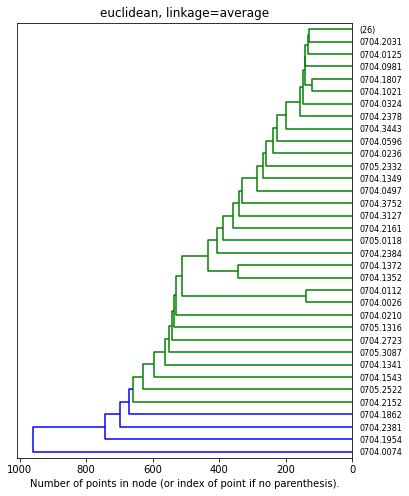

In [ ]:
parm_affinity = 'euclidean'
param_linkage = 'average'
  # setting distance_threshold=0 ensures we compute the full tree.
  # affinity: 距離の出す際の計算方法 
  #linkage : 観測セット間で使用する距離 ward マージされるクラスターの分散を最小限に抑える 
  #distance_threshold クラスターはマージされないリンケージ距離のしきい値
  #n_clusters 検索するクラスターの数
model = AgglomerativeClustering(affinity= parm_affinity,
linkage= param_linkage, 
distance_threshold=0,
n_clusters=None)
model = model.fit(df)
fig = plt.figure( figsize=(6,8))
plt.title(parm_affinity + ', linkage=' + param_linkage )
  # plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level')#, p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#plt.figure(figsize=(6, 8), dpi=300)
  #fig.savefig("dendrogram.pdf")
plt.savefig("dendrogram_z_euclidean_mean.pdf", bbox_inches='tight')
plt.show()

In [ ]:
#k-means
result = KMeans(n_clusters= 6 ).fit_predict(df_minmax_norm)

In [ ]:
show_result(file_names_list,result,6)

[['0704.2378',
  '0704.2381',
  '0704.2384',
  '0704.2723',
  '0704.3127',
  '0704.3443',
  '0704.3752',
  '0705.2332',
  '0705.2522',
  '0705.3087',
  '0704.0324',
  '0704.0497',
  '0704.1164',
  '0704.1207',
  '0704.1352',
  '0704.1954'],
 ['0704.0236',
  '0704.0596',
  '0704.0981',
  '0704.1021',
  '0704.1807',
  '0704.1851',
  '0704.0402',
  '0704.1372'],
 ['0704.0074',
  '0704.1556',
  '0704.1557',
  '0704.1892',
  '0704.2161',
  '0705.0118',
  '0705.1316',
  '0705.2067',
  '0704.0087',
  '0704.0317',
  '0704.0853',
  '0704.1005',
  '0704.1341',
  '0704.1446',
  '0704.1543',
  '0704.1673',
  '0704.1982',
  '0704.1986',
  '0704.2081',
  '0704.2119',
  '0704.0125',
  '0704.0337',
  '0704.0565',
  '0704.0786',
  '0704.1163',
  '0704.1208',
  '0704.1349',
  '0704.1861',
  '0704.1862',
  '0704.2031',
  '0704.2104',
  '0704.2359'],
 ['0704.2152'],
 ['0704.0210'],
 ['0704.0026', '0704.0112']]

In [ ]:
#それぞれのクラスターでよく用いられる単語10個
trend(df,result,6,20,df_minmax_norm.columns)

[(0, Index(['subword', 'zωt', 'permitting', 'multiplicative', 'nil', 'algebra',
         'rng', 'nondegenerate', 'algebras', 'aαβ', 'zbr', 'eae', 'koszul',
         'quadratic', 'azumaya', 'prime', 'subalgebra', 'app', 'xixi', 'let'],
        dtype='object')),
 (1, Index(['hypersurfaces', 'curvature', 'gij', 'kukl', 'hypersurface',
         'conformally', 'riemannian', 'parabolic', 'aαβ', 'estimates', 'lemma',
         'elliptic', 'satisﬁes', 'theorem', 'spacelike', 'zbr', 'vector', 'let',
         'then', 'proof'],
        dtype='object')),
 (2,
  Index(['udx', 'homt', 'morita', 'injective', 'novikov', 'trs', 'nonholonomic',
         'rhomr', 'rng', 'cid', 'contexts', 'εij', 'module', 'hyperbolic',
         'theorem', 'bilinear', 'discrete', 'lie', 'let', 'then'],
        dtype='object')),
 (3, Index(['mlc', 'lamination', 'laminations', 'spacetimes', 'earthquake',
         'geodesic', 'hyperbolic', 'spacelike', 'every', 'type', 'such', 'that',
         'cid', 'injective', 'proposition

In [ ]:
#k-means
result = KMeans(n_clusters= 7 ).fit_predict(df_minmax_norm)

In [ ]:
show_result(file_names_list,result,7 )

[['0704.1164', '0704.1207', '0704.1352', '0704.1372', '0704.1954'],
 ['0704.2723', '0704.3752', '0705.1316', '0705.2332'],
 ['0704.0074',
  '0704.1556',
  '0704.1557',
  '0704.1892',
  '0704.2161',
  '0705.0118',
  '0705.2067',
  '0704.0087',
  '0704.0236',
  '0704.0317',
  '0704.0596',
  '0704.0853',
  '0704.0981',
  '0704.1005',
  '0704.1021',
  '0704.1341',
  '0704.1446',
  '0704.1543',
  '0704.1673',
  '0704.1807',
  '0704.1851',
  '0704.1982',
  '0704.1986',
  '0704.2081',
  '0704.2119',
  '0704.0125',
  '0704.0337',
  '0704.0402',
  '0704.0565',
  '0704.0786',
  '0704.1163',
  '0704.1208',
  '0704.1349',
  '0704.1861',
  '0704.1862',
  '0704.2031',
  '0704.2104',
  '0704.2359'],
 ['0704.2378',
  '0704.2381',
  '0704.2384',
  '0704.3443',
  '0705.2522',
  '0705.3087',
  '0704.0324',
  '0704.0497'],
 ['0704.2152'],
 ['0704.0026', '0704.0112'],
 ['0704.3127', '0704.0210']]

In [ ]:
#それぞれのクラスターでよく用いられる単語10個
trend(df,result,7,20,df_minmax_norm.columns)

[(0, Index(['zωt', 'aαβ', 'zbr', 'kukl', 'lim', 'estimates', 'parabolic',
         'elliptic', 'satisﬁes', 'that', 'sup', 'deduce', 'theorem', 'proof',
         'lemma', 'such', 'then', 'for', 'cid', 'any'],
        dtype='object')),
 (1,
  Index(['novikov', 'nil', 'koszul', 'xixi', 'lie', 'subalgebra', 'algebras',
         'algebra', 'then', 'let', 'lemma', 'every', 'theorem', 'contradiction',
         'that', 'proof', 'module', 'following', 'follows', 'all'],
        dtype='object')),
 (2, Index(['udx', 'homt', 'morita', 'injective', 'trs', 'nonholonomic',
         'curvature', 'rhomr', 'conformally', 'rng', 'riemannian',
         'hypersurfaces', 'gij', 'cid', 'contexts', 'theorem', 'εij',
         'hypersurface', 'let', 'hyperbolic'],
        dtype='object')),
 (3, Index(['subword', 'permitting', 'multiplicative', 'rng', 'nondegenerate',
         'azumaya', 'algebra', 'quadratic', 'prime', 'app', 'algebras', 'over',
         'quaternion', 'let', 'form', 'then', 'such', 'there', 'th